# California Housing Prices - mini project
* based on "Hands-on ML with scikit-learn and Tensorflow from A. ...
* build a model of housing prices in California using Califormia census data

In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd
import numpy as np

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
#displays all column list and reverts the columns and rows
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df.transpose())

In [6]:
housing = load_housing_data()
display_all(housing.head())

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41,21,52,52,52
total_rooms,880,7099,1467,1274,1627
total_bedrooms,129,1106,190,235,280
population,322,2401,496,558,565
households,126,1138,177,219,259
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600,358500,352100,341300,342200
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


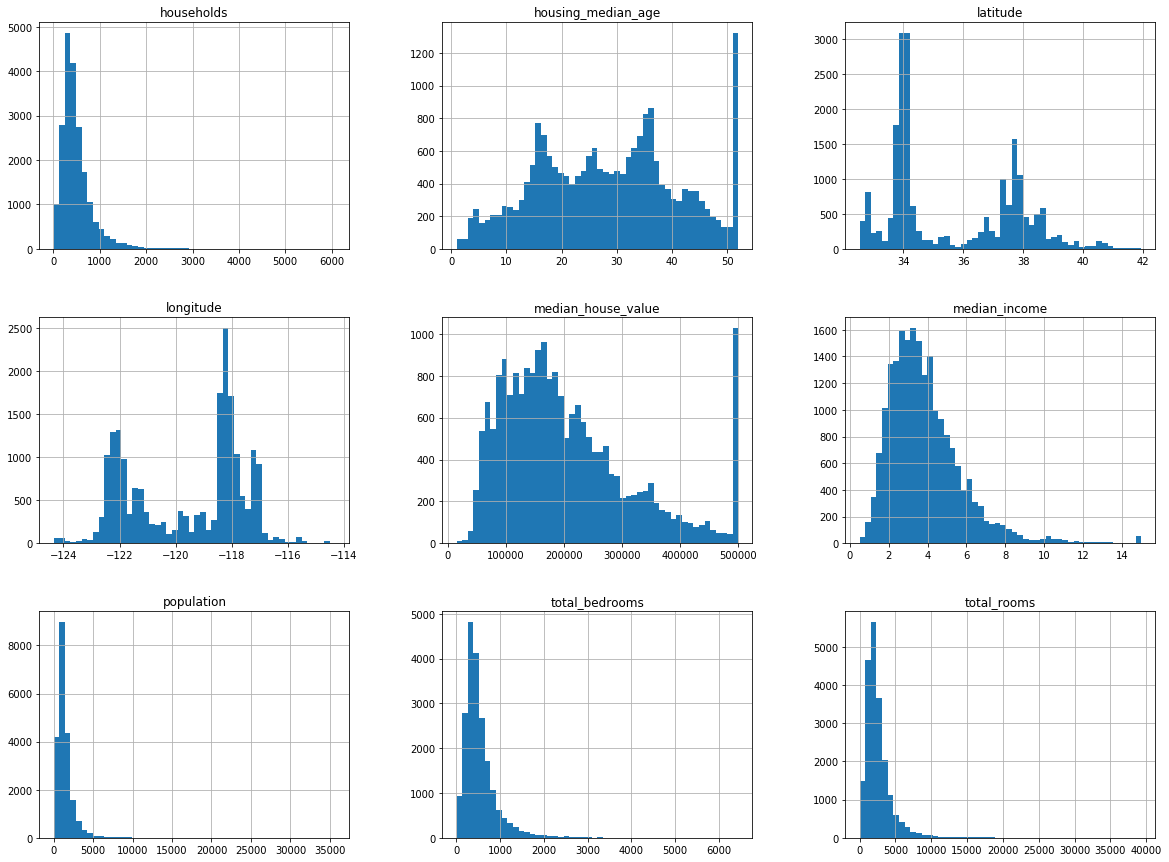

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

* implement test set creation methods - which creates a hash of each identifier of each instance, then take the last byte and put the instance in the test set if this value is lower or equal to 51 (~20% of 256) - this ensures that the instances selected for test set always stays there (even new updated data set is fetched) in addition to the new test instances

In [11]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
#add an index column to the data - but make sure thatwhen using this
#if you add new data - always add to the end and never delete rows

housing_with_id = housing.reset_index() # adds an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [13]:
#can do similar thing in scikit-learn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

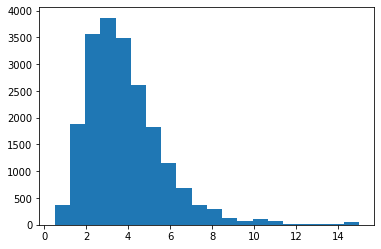

In [14]:
#stratified sampling for median imcome
plt.hist(housing.median_income, 20)
plt.show()

In [15]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
display_all(housing)

0         1         2         3         4      \
longitude            -122.23   -122.22   -122.24   -122.25   -122.25   
latitude               37.88     37.86     37.85     37.85     37.85   
housing_median_age        41        21        52        52        52   
total_rooms              880      7099      1467      1274      1627   
total_bedrooms           129      1106       190       235       280   
population               322      2401       496       558       565   
households               126      1138       177       219       259   
median_income         8.3252    8.3014    7.2574    5.6431    3.8462   
median_house_value    452600    358500    352100    341300    342200   
ocean_proximity     NEAR BAY  NEAR BAY  NEAR BAY  NEAR BAY  NEAR BAY   
income_cat                 5         5         5         4         3   

                       5         6         7         8         9      \
longitude            -122.25   -122.25   -122.25   -122.26   -122.25   
latitude               37.85     37.84     37.84     37.84     37.84   
housing_median_age        52        52        52        42        52   
total_rooms              919      2535      3104      2555      3549   
total_bedrooms           213       489       687       665       707   
population               413      1094      1157      1206      1551   
households               193       514       647       595       714   
median_income         4.0368    3.6591      3.12    2.0804    3.6912   
median_house_value    269700    299200    241400    226700    261100   
ocean_proximity     NEAR BAY  NEAR BAY  NEAR BAY  NEAR BAY  NEAR BAY   
income_cat                 3         3         3         2         3   

                       10        11        12        13        14     \
longitude            -122.26   -122.26   -122.26   -122.26   -122.26   
latitude               37.85     37.85     37.85     37.84     37.85   
housing_median_age        52        52        52        52        52   
total_rooms             2202      3503      2491       696      2643   
total_bedrooms           434       752       474       191       626   
population               910      1504      1098       345      1212   
households               402       734       468       174       620   
median_income         3.2031    3.2705     3.075    2.6736    1.9167   
median_house_value    281500    241800    213500    191300    159200   
ocean_proximity     NEAR BAY  NEAR BAY  NEAR BAY  NEAR BAY  NEAR BAY   
income_cat                 3         3         3         2         2   

                       15        16        17        18        19     \
longitude            -122.26   -122.27   -122.27   -122.26   -122.27   
latitude               37.85     37.85     37.85     37.84     37.84   
housing_median_age        50        52        52        50        52   
total_rooms             1120      1966      1228      2239      1503   
total_bedrooms           283       347       293       455       298   
population               697       793       648       990       690   
households               264       331       303       419       275   
median_income          2.125     2.775    2.1202    1.9911    2.6033   
median_house_value    140000    152500    155500    158700    162900   
ocean_proximity     NEAR BAY  NEAR BAY  NEAR BAY  NEAR BAY  NEAR BAY   
income_cat                 2         2         2         2         2   

                       20        21        22        23        24     \
longitude            -122.27   -122.27   -122.27   -122.27   -122.27   
latitude               37.85     37.85     37.84     37.84     37.84   
housing_median_age        40        42        52        52        52   
total_rooms              751      1639      2436      1688      2224   
total_bedrooms           184       367       541       337       437   
population               409       929      1015       853      1006   
households               166       366       478       325 

In [16]:
#apply stratified sampling from scikit-learn
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [18]:
#check the percentages in stratified test set - they match perfectly!
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [19]:
# remove the income_cat attribute
for set in(strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis = 1, inplace = True)

# Discover and Visualize

In [20]:
#make a copy of training set for exploration
housing = strat_train_set.copy()

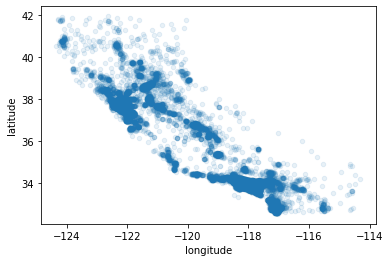

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)

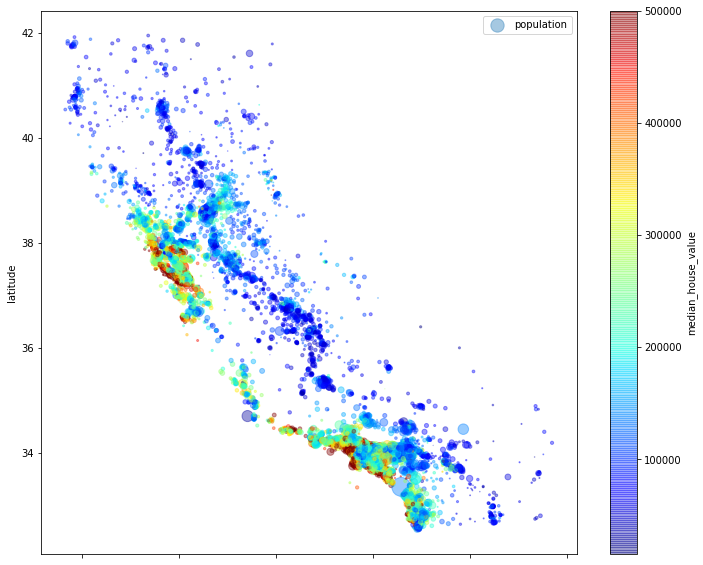

In [22]:
housing.plot(kind="scatter", x = "longitude", y= "latitude", alpha = 0.4,
            s = housing["population"]/100, label = "population",
            c = "median_house_value", cmap = plt.get_cmap("jet"),
            colorbar= True, figsize=(12,10))


# Correlations

In [23]:
#calcuate Pearson correlation coefficient
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab0a1c1190>,
      dtype=object)

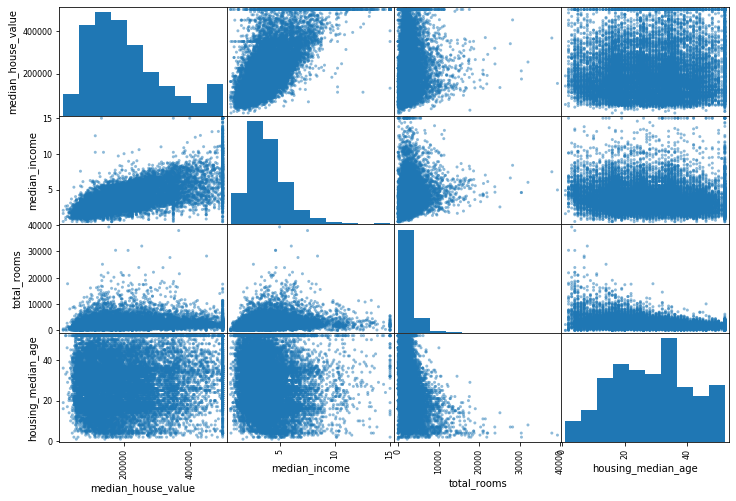

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12, 8))

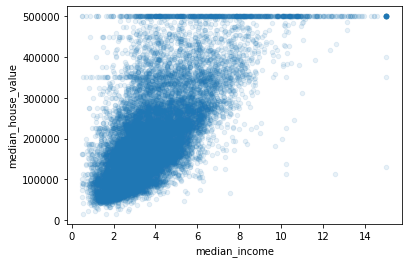

In [25]:
#zoom in in median income scatter plot
housing.plot(kind="scatter", x = "median_income", y = "median_house_value", alpha = 0.1)

# Experiment with Attribute Combinations

In [26]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [27]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Prepare the Data for ML Algorithms

In [28]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [29]:
#replace missing values with meadian
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

#remove the "ocean proximity" categoric feature, keeping only numericals
housing_num = housing.drop("ocean_proximity", axis = 1)

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [30]:
#show the calculated median values for all features
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [31]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [32]:
#apply the "trained" imputer to the training data
X = imputer.transform(housing_num) #outputs plain NumPy array
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [33]:
#Convert Categorical values to numerics

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [34]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [35]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
#one hot encode the category
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [37]:
#Create a custom transformer class

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [38]:
#Implement a data transformation pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [39]:
#combine numerical and categorical transformers into single pipeline

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

# Select and train a Model

## Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [42]:
#measure the RMSE on training set
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_predictions, housing_labels)
lin_rmse = np.sqrt(lin_mse)
print("Linear Reg. RMSE training: ", lin_rmse)

RMSE training:  68628.19819848922


## DecisionTree

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [50]:
housing_predictions = tree_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_predictions, housing_labels)
lin_rmse = np.sqrt(lin_mse)
print("Decision Tree RMSE training: ", lin_rmse)

Decision Tree RMSE training:  0.0


In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores): 
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
    
display_scores(scores)

Scores:  [-4.74318887e+09 -4.87304098e+09 -5.06436956e+09 -4.61988028e+09
 -5.13592715e+09 -5.57550930e+09 -5.23571204e+09 -5.12099170e+09
 -6.01517608e+09 -4.85802283e+09]
Mean:  -5124181878.548794
Standard deviation:  393334450.7023382


In [54]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv = 10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard deviation:  2731.674001798348


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_predictions, housing_labels)
print("Random Forest RMSE: ", np.sqrt(forest_rmse))

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring = "neg_mean_squared_error", cv = 10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

/home/arifb/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest RMSE:  22560.955050812056
Scores:  [52195.60613521 49959.07748964 52767.2589141  55712.80607207
 52161.94614994 55804.97818222 50450.0951695  50487.79272238
 55970.90211536 52721.62921229]
Mean:  52823.20921627155
Standard deviation:  2174.4512220918314


In [63]:
# save any model with joblib

import joblib

joblib.dump(forest_reg, "forest_reg_1stTry.pkl")


#then to load use:
#my_model_loaded = joblib.load("forest_reg_1stTry.pkl")

['forest_reg_1stTry.pkl']

# Hyper-parameter tuning

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6]},
    {"bootstrap": [False], "n_estimators": [ 3, 10], "max_features": [2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6],
   

In [65]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [66]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [67]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63557.302391058154 {'max_features': 2, 'n_estimators': 3}
55469.81154484176 {'max_features': 2, 'n_estimators': 10}
53228.849337513435 {'max_features': 2, 'n_estimators': 30}
60105.55460761661 {'max_features': 4, 'n_estimators': 3}
52232.99273983766 {'max_features': 4, 'n_estimators': 10}
50756.96660196576 {'max_features': 4, 'n_estimators': 30}
60106.143381124304 {'max_features': 6, 'n_estimators': 3}
52389.872429621806 {'max_features': 6, 'n_estimators': 10}
50194.47722400529 {'max_features': 6, 'n_estimators': 30}
62841.32410678051 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54233.38147848982 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60096.90263529112 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52720.430731632434 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58680.160790909926 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51190.16326521275 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [68]:
#feature importances
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.85087479e-02, 7.12634175e-02, 4.25373887e-02, 1.71148210e-02,
       1.62795723e-02, 1.72214277e-02, 1.64659617e-02, 3.22427856e-01,
       5.96808076e-02, 1.07909322e-01, 7.63019645e-02, 1.42747566e-02,
       1.52792593e-01, 4.19585067e-05, 3.18298201e-03, 3.99642284e-03])

In [69]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32242785563169507, 'median_income'),
 (0.1527925933465609, 'INLAND'),
 (0.10790932235066646, 'pop_per_hhold'),
 (0.07850874786152168, 'longitude'),
 (0.07630196451468359, 'bedrooms_per_room'),
 (0.07126341747039092, 'latitude'),
 (0.05968080758744248, 'rooms_per_hhold'),
 (0.04253738867563575, 'housing_median_age'),
 (0.017221427659221352, 'population'),
 (0.0171148209559756, 'total_rooms'),
 (0.016465961667623742, 'households'),
 (0.016279572333093805, 'total_bedrooms'),
 (0.01427475659584159, '<1H OCEAN'),
 (0.003996422837745497, 'NEAR OCEAN'),
 (0.003182982005189717, 'NEAR BAY'),
 (4.1958506711950984e-05, 'ISLAND')]

# Evaluate on test set

In [71]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2
print("Test RMSE: ", final_rmse)

Test RMSE:  47424.94052873879


In [72]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45450.27310795, 49320.61072941])